# Excrice 10.2 Time Series

http://thinkstats2.com

Felipe Castillo

11/07/2021

MIT License: https://opensource.org/licenses/MIT


In [10]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os
os.chdir(r'C:\ExplorartoryDataAnalysis_DSC_530\ThinkStats2\code')

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

In [12]:
def GroupByDay(transactions, func=np.mean):
    """Groups 1transactions by day and compute the daily mean ppg.

    transactions: DataFrame of transactions

    returns: DataFrame of daily prices
    """
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')1
    daily['years'] = (daily.date - start) / one_year

    return daily

The following function returns a map from quality name to a DataFrame of daily averages.

In [13]:
def GroupByQualityAndDay(transactions):
    """Divides transactions by quality and computes mean daily price.

    transaction: DataFrame of transactions
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

## Exercises

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [127]:
# Solution goes here
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()





,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [128]:
import statsmodels.formula.api as smf

def RunQModel(daily):
    
    """Logic Taken from page 133"""
    
    daily['year2'] = daily.years**2
    
    model = smf.ols('ppg ~ years + year2', data=daily)
    results = model.fit()
    return model, results

In [136]:
dailies = GroupByQualityAndDay(transactions)

In [129]:
# Solution goes here
name = 'high'
daily = dailies[name]


In [131]:
# Solution goes here

model, result = RunQModel(daily)




Text(0.5, 1.0, 'Quadtric model plot ')

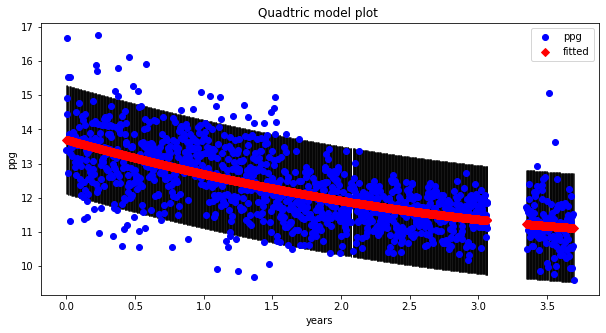

In [132]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 5))

fig = sm.graphics.plot_fit(result, "years", ax=ax)

plt.title("Quadtric model plot ")





**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [133]:
# Solution goes class
# structure found on page 103
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    
    def TestStatistic(self, data):
       
        series, lag = data
        test_stat = abs(thinkstats2.SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
      
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [134]:
# Solution goes here

series = daily.ppg

invokedTest = SerialCorrelationTest((series, 2))

ptest = invokedTest.PValue()

print(ptest)

0.0


In [135]:
# Solution goes here

value, qaudInfo = RunQModel(daily)

series = qaudInfo.resid

testValue = SerialCorrelationTest((series, 1))

ptest = testValue.PValue()

print(ptest)

#series = qaudInfo.res

0.043
